# Определение перспективного тарифа для телеком компании 

**Цель** - определить какой тариф приносит больше выручки.

**Задачи**:
- сделать предварительный анализ тарифов. 
- определить: кто клиенты оператора, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
- сделать вывод.

В нашем распоряжении выборка из 500 клиентов. 

***Описание тарифов***
_________________________________________________________________________
**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

*Стоимость услуг сверх тарифного пакета:*
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей
_________________________________________________________________________
**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

*Стоимость услуг сверх тарифного пакета:*
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей
________________________________________________________________________
*значения минут и Мб округляются вверх*

**План**:
1. Открыть данные и изучить общую информацию;
2. Подготовить данные:
    - Привести данные к нужным типам;
    - Найти и исправить ошибки.
    - Рассчитать для каждого абонента:
        - количество сделанных звонков и израсходованных минут разговора по месяцам;
        - количество отправленных сообщений по месяцам;
        - объем израсходованного интернет-трафика по месяцам;
        - помесячную выручку с каждого абонента.
4. Описать поведение абонентов: 
    - Сколько минут разговора, сообщений и какой объём интернет-трафика требуется абонентам каждого тарифа в месяц; 
    - Рассчитать среднее количество, дисперсию и стандартное отклонение;
    - Построить гистограммы
    - Описать распределения.
5. Проверить гипотезы
    - средняя выручка от абонентов тарифов «Ультра» и «Смарт» различается;
    - средняя выручка от абонентов из Москвы отличается от выручки пользователей из других регионов;
6. [Сделать общий вывод.](#total_conclusion)

### Открытие файла с данными и изучение общей информации. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
calls = pd.read_csv('calls.csv', parse_dates=['call_date'])
internet= pd.read_csv('internet.csv', index_col=0, parse_dates=['session_date'])
messages= pd.read_csv('messages.csv', parse_dates=['message_date'])
tariffs= pd.read_csv('tariffs.csv')
users= pd.read_csv('users.csv', parse_dates=['reg_date'])

In [3]:
datas = [calls, internet, messages, tariffs, users]
for df in datas:
    df.info()
    display(df.head())
    print('-----------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


-----------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


-----------------------------------


In [4]:
display(internet['mb_used'].describe())
display(calls['duration'].describe())

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

найдем долю продолжительности звонков и интернет-трафика равных 0.0

In [5]:
print('доля 0 в звонках:', (calls.loc[calls['duration']==0.0, 'duration'].count()/len(calls['duration'])*100).round(2))
print('доля 0 в интернет-трафике:',(internet.loc[internet['mb_used']==0, 'mb_used'].count()/len(internet['mb_used'])*100).round(2))

доля 0 в звонках: 19.55
доля 0 в интернет-трафике: 13.12


поищем источники нулей в использованных Мб

In [6]:
zero_internet=internet.loc[internet['mb_used']==0]
zero_internet.pivot_table(index='user_id', values='mb_used', aggfunc='count')
#zero_internet.head(20)

,mb_used
user_id,
1000,14
1001,14
1002,72
1003,2
1004,22
...,...
1495,10
1496,141
1497,16


0 значения в использованных Мб интернета присутствуют у всех пользователей, при чем в разном количестве и в разные даты, значит это не централизованный сбой. возможная причина это оставление включенным мобильного интернета при пользовании wi-fi. значит на выручку эти значения не повлияют, значит можно удалить.

заменим название столбца tariff_name на tariff в таблице tariffs, чтобы потом объединить таблицы по этому столбцу

In [7]:
tariffs=tariffs.rename(columns={'tariff_name':'tariff'})
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Промежуточный вывод

- в данных нет пропусков;
- есть странный столбец Unnamed: 0 в таблице internet, который дублирует индексы, сделали его столбцом с индексами;
- 0.0 в продолжительности звонка. возможно неотвеченные вызовы, их 19.55% во всем датасете. можно удалить т.к. на стоимость и количество потраченных минут они не влияют;
- 13.12% 0 в использованных Мб, возможная причина это оставление включенным мобильного интернета при пользовании wi-fi. значит на выручку эти значения не повлияют, значит можно удалить.
- 442 пользователя на момент сбора данных продолжали пользоваться тарифами, из-за этого много пропусков в столбце churn_date таблицы users, удалять нельзя;
- столбцы с датами во всех таблицах имеют тип obj, надо поменять на datetime;
- дубликатов нет.

### Подготовка данных.

#### Исправление ошибок

удалим строки с продолжительностью звонка и использованным Мб равными 0

In [8]:
calls=calls.loc[calls['duration']!=0.0]
#calls.head()

internet=internet.loc[internet['mb_used']!=0]
#internet.sample(5)

#### Объединение таблиц

округлим до целых в большую сторону, т.к. у тарифов такие же условия.

In [9]:
calls.loc[:, 'duration']=np.ceil(calls.loc[:, 'duration'])
calls.loc[:, 'duration']=calls.loc[:, 'duration'].astype('uint32')
internet.loc[:, 'mb_used']=np.ceil(internet.loc[:,'mb_used'])
internet.loc[:, 'mb_used']=internet.loc[:, 'mb_used'].astype('uint32')
#internet.info()

добавим столбцы со значениями месяцев для последующей группировки

In [10]:
#функция добавляющая столбец с номером месяца
def months(df, col):
    df['month']=df[col].dt.month.astype('int8')

In [11]:
months(calls, 'call_date')
months(internet, 'session_date')
months(messages, 'message_date')

сгруппируем датасеты по user_id и номеру месяца

In [12]:
calls_gr=calls.pivot_table(index=['user_id', 'month'], values ='duration', aggfunc='sum')
internet_gr=internet.pivot_table(index=['user_id', 'month'], values ='mb_used', aggfunc='sum')
messages_gr=messages.pivot_table(index=['user_id', 'month'], values ='message_date', aggfunc='count')

объединим датасеты в 1

In [13]:
df=calls_gr.merge(internet_gr, on=['user_id', 'month'], how='outer')
df=df.merge(messages_gr, on=['user_id', 'month'], how='outer')
df=users.merge(df, on='user_id', how='left')
df=df.merge(tariffs, on='tariff', how='outer')
df=df.rename(columns={'duration':'minutes_per_month','mb_used':'mb_per_month','message_date':'messages_per_month'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   age                    3216 non-null   int64         
 2   churn_date             189 non-null    object        
 3   city                   3216 non-null   object        
 4   first_name             3216 non-null   object        
 5   last_name              3216 non-null   object        
 6   reg_date               3216 non-null   datetime64[ns]
 7   tariff                 3216 non-null   object        
 8   minutes_per_month      3168 non-null   float64       
 9   mb_per_month           3201 non-null   float64       
 10  messages_per_month     2717 non-null   float64       
 11  messages_included      3216 non-null   int64         
 12  mb_per_month_included  3216 non-null   int64         
 13  min

- в таблицу перенеслись ненужные для исследования толбцы, удалим их. 
- минуты смс и Мб надо сделать целыми числами.
- образовались пропуски в использованных минутах, смс и Мб, причина, что абоненты использовали не все виды услуг, заполним нулями.

In [14]:
# функция заполняющая пропуски нулями
def fill_zero(df, col):
    df[col]=df[col].fillna(0)

In [15]:
fill_zero(df, 'minutes_per_month')
fill_zero(df, 'mb_per_month')
fill_zero(df, 'messages_per_month')

заменим типы данных

In [16]:
df.loc[:, 'minutes_per_month']=df.loc[:,'minutes_per_month'].astype('uint32')
df.loc[:,'mb_per_month']=df.loc[:,'mb_per_month'].astype('uint32')
df.loc[:,'messages_per_month']=df.loc[:,'messages_per_month'].astype('uint32')
#df.info()

удалим ненужные столбцы

In [17]:
df.drop(['age', 'first_name', 'last_name'], axis=1, inplace=True)
df.head()

,user_id,churn_date,city,reg_date,tariff,minutes_per_month,mb_per_month,messages_per_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,NaN,Краснодар,2018-05-25,ultra,159,2256,22,1000,30720,3000,1950,150,1,1
1,1000,NaN,Краснодар,2018-05-25,ultra,172,23257,60,1000,30720,3000,1950,150,1,1
2,1000,NaN,Краснодар,2018-05-25,ultra,340,14016,75,1000,30720,3000,1950,150,1,1
3,1000,NaN,Краснодар,2018-05-25,ultra,408,14070,81,1000,30720,3000,1950,150,1,1
4,1000,NaN,Краснодар,2018-05-25,ultra,466,14581,57,1000,30720,3000,1950,150,1,1


рассчитаем выручку с каждого абонента в месяц

In [18]:
# посчитаем выручку за количество сверх трафика
df['minutes_over']=(df['minutes_per_month']-df['minutes_included'])*df['rub_per_minute']
df['mb_over']=np.ceil((df['mb_per_month']-df['mb_per_month_included'])/1024)*df['rub_per_gb']
df['messages_over']=(df['messages_per_month']-df['messages_included'])*df['rub_per_message']

# удалим отрицателтьные значения
df.loc[df['minutes_over']<0, 'minutes_over']=0
df.loc[df['mb_over']<0, 'mb_over']=0
df.loc[df['messages_over']<0, 'messages_over']=0

# посчитаем выручку
df['income']=df[['rub_monthly_fee', 'minutes_over', 'mb_over', 'messages_over']].sum(axis=1).astype('uint16')
df.sample(5)

,user_id,churn_date,city,reg_date,tariff,minutes_per_month,mb_per_month,messages_per_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,mb_over,messages_over,income
1837,1183,NaN,Владивосток,2018-07-12,smart,326,9898,24,50,15360,500,550,200,3,3,0,0.0,0,550
2389,1308,NaN,Москва,2018-01-04,smart,250,11978,24,50,15360,500,550,200,3,3,0,0.0,0,550
612,1341,NaN,Москва,2018-06-22,ultra,1143,27753,53,1000,30720,3000,1950,150,1,1,0,0.0,0,1950
2493,1329,NaN,Набережные Челны,2018-10-08,smart,455,17472,10,50,15360,500,550,200,3,3,0,600.0,0,1150
1229,1052,NaN,Санкт-Петербург,2018-07-27,smart,682,19562,106,50,15360,500,550,200,3,3,546,1000.0,168,2264


#### Промежуточный вывод

- удалили строки с продолжительностью звонка равной 0.0, т.к. это непринятые исходящие, а значит на выручку они не влияют;
- удалили 0 в использованных Мб.
- округлили суммы трафика в большую сторону;
- сгруппировали таблицы по user_id и месяцу и объединили в один;
- удалили ненужные столбцы с ФИО, возрастом;
- посчитана выручка от каждого абонента в месяц.

### Описание поведения пользователей.

In [19]:
df.groupby('tariff').agg({'minutes_per_month':'mean','mb_per_month':'mean','messages_per_month':'mean', 'income':'mean'})

,minutes_per_month,mb_per_month,messages_per_month,income
tariff,,,,
smart,417.747534,16221.910762,33.369058,1294.305381
ultra,526.089249,19467.137931,49.313387,2070.943205


в среднем абоненты, пользующиеся тарифом Smart используют 394 мин., 16 Гб, 33 смс. абоненты Ultra - 496 мин. 19 Гб, 49 смс.
отсюда следует, что в среднем абоненты Smart докупают 1 Гб интернета, а абоненты Ultra не докупают ничего. средняя выручка от тарифа Smart составляет 1195 руб. (т.е. 645 руб. сверх ежемесячного платежа), от тарифа Ultra - 2060 руб. (110 руб. сверх).

отфильтруем абоненов по тарифам

In [20]:
ultra = df.loc[df['tariff']=='ultra']
smart = df.loc[df['tariff']=='smart']

рассчитаем дисперсию и стандартое отклонение для каждого вида трафика

In [21]:
#дисперсия
var_smart_mins = np.var(smart['minutes_per_month'], ddof=1)
var_smart_mb = np.var(smart['mb_per_month'], ddof=1)
var_smart_message = np.var(smart['messages_per_month'], ddof=1)
var_smart_income = np.var(smart['income'], ddof=1)
var_ultra_mins = np.var(ultra['minutes_per_month'], ddof=1)
var_ultra_mb = np.var(ultra['mb_per_month'], ddof=1)
var_ultra_message =np.var(ultra['messages_per_month'], ddof=1)
var_ultra_income =np.var(ultra['income'], ddof=1)

In [22]:
# стандартное отклонение
std_smart_mins= np.std(smart['minutes_per_month'], ddof=1)
std_smart_mb= np.std(smart['mb_per_month'], ddof=1)
std_smart_message=np.std(smart['messages_per_month'], ddof=1)
std_smart_income=np.std(smart['income'], ddof=1)
std_ultra_mins=np.std(ultra['minutes_per_month'], ddof=1)
std_ultra_mb=np.std(ultra['mb_per_month'], ddof=1)
std_ultra_message=np.std(ultra['messages_per_month'], ddof=1)
std_ultra_income=np.std(ultra['income'], ddof=1)

создадим таблицу с результатами

In [23]:
var=pd.DataFrame(data=(['Дисперсия минут', var_smart_mins, var_ultra_mins], 
                       ['Дисперсия Мб', var_smart_mb, var_ultra_mb], 
                       ['Дисперсия сообщений', var_smart_message, var_ultra_message], 
                       ['Дисперсия выручки', var_smart_income, var_ultra_income], 
                       ['Cтанд. отклонение минут', std_smart_mins, std_ultra_mins], 
                       ['Cтанд. отклонение Мб', std_smart_mb, std_ultra_mb],
                       ['Cтанд. отклонение сообщений', std_smart_message, std_ultra_message],
                       ['Cтанд. отклонение выручки', std_smart_income, std_ultra_income]), 
                 columns = ('parameter', 'smart', 'ultra' ))
var[['smart', 'ultra']].astype('float')
var.style.format({'smart':'{:.2f}'})
var.style.format({'ultra':'{:.2f}'})

,parameter,smart,ultra
0,Дисперсия минут,36281.393836,101052.49
1,Дисперсия Мб,34648523.300692,102217264.28
2,Дисперсия сообщений,796.955256,2285.42
3,Дисперсия выручки,673877.623614,143360.43
4,Cтанд. отклонение минут,190.476754,317.89
5,Cтанд. отклонение Мб,5886.299627,10110.26
6,Cтанд. отклонение сообщений,28.230396,47.81
7,Cтанд. отклонение выручки,820.900496,378.63


страндартные отклонения по трафикам тарифа ultra больше, чем в smart почти в 2 раза, что говорит о том, что разброс значений для тарифа ultra в среднем в 2 раза больше чем для тарифа smart. однако если рассмотреть значения стандартного отклонения относительно размера трафика для каждого тарифа, то отклонение для smart составляет ~36% от пакетного количества минут, ~39% от размера интернет трафика и ~57% от числа смс. в то время как для тарифа ultra они составляют ~10%, ~34% и ~5% соответственно, что говорит о том, что абоненты тарифа smart чаще выходят за рамки трафика, а абонеты тарифа ultra, часто не используют и половины трафика минут и смс. отклонение выручки для smart в 2 раза выше, чем для ultra, что говорит о том, что абоненты smart чаще покупают дополнительный трафик.

In [24]:
# количество корзин
def my_bins(df,value):
    if df[value].max() > 100:
        return 50
    elif df[value].max() > 500:
        return  100
    elif df[value].max() > 1000:
        return  200
    else: return 20

In [38]:
#функция, создающая 2 графика по 2 таблицам с одинаковым столбцом
def hists(df1, df2, col, title, x_label, y_label):
    df1[col].plot(kind='hist', histtype='step', linewidth=3, bins=my_bins(df, col), alpha=0.7, figsize=(9, 5), label = 'Smart')
    df2[col].plot(kind='hist',  histtype='step', linewidth=3, bins=my_bins(df, col), alpha=0.7, figsize=(9, 5), label='Ultra')
    plt.axvline(x=df2[col].median(), linewidth=2, color='red', label='median_ultra')
    plt.axvline(x=df2[col].mean(), linewidth=2, color='green', label='mean_ultra')
    plt.axvline(x=df1[col].median(), linewidth=2, color='blue', label='median_smart', linestyle='--')
    plt.axvline(x=df1[col].mean(), linewidth=2, color='yellow', label='mean_smart', linestyle='--')
    plt.legend()
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

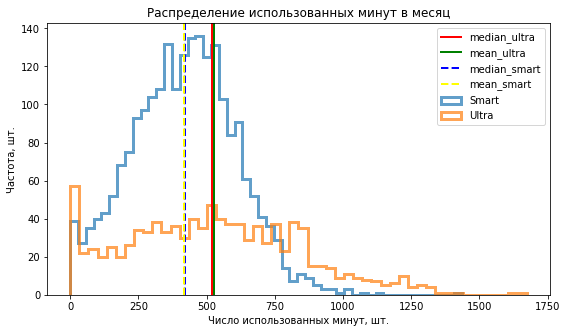

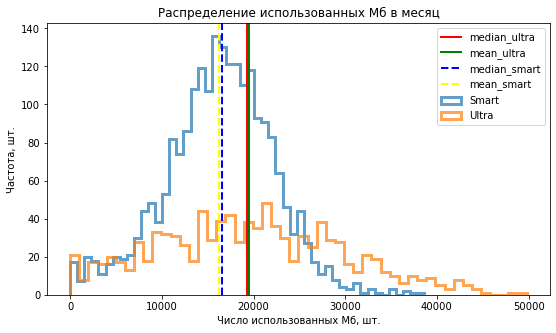

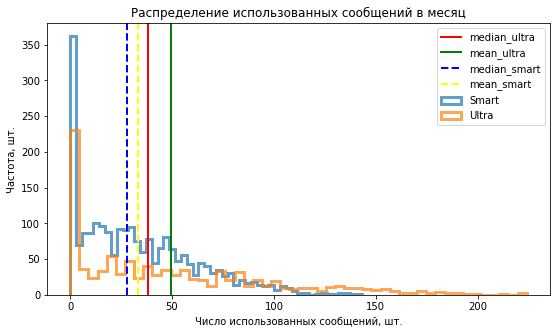

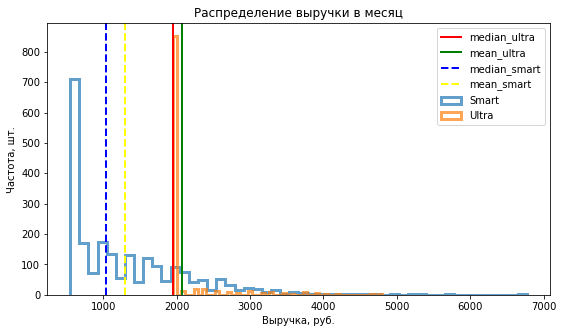

In [39]:
hists(smart, ultra, 'minutes_per_month', 'Распределение использованных минут в месяц', 
      'Число использованных минут, шт.', 'Частота, шт.')
hists(smart, ultra, 'mb_per_month', 'Распределение использованных Мб в месяц', 
      'Число использованных Мб, шт.', 'Частота, шт.')
hists(smart, ultra, 'messages_per_month', 'Распределение использованных сообщений в месяц', 
      'Число использованных сообщений, шт.', 'Частота, шт.')
hists(smart, ultra, 'income', 'Распределение выручки в месяц', 
      'Выручка, руб.', 'Частота, шт.')

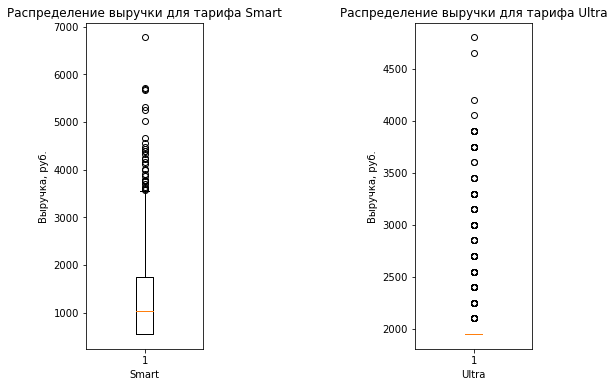

In [33]:
fig, axes=plt.subplots(figsize=(8, 6), nrows=1, ncols=2)
axes[0].boxplot(smart['income'])
axes[0].set_xlabel('Smart')
axes[0].set_ylabel('Выручка, руб.')
axes[0].set_title('Распределение выручки для тарифа Smart')
axes[1].boxplot(ultra['income'])
axes[1].set_xlabel('Ultra')
axes[1].set_ylabel('Выручка, руб.')
axes[1].set_title('Распределение выручки для тарифа Ultra')
plt.subplots_adjust(wspace=1.8)
plt.show()

- распределения минут и Мб для тарифа smart имеют нормальное распреденение, т.к. медианы и средние совпадают. 
- расределения минут и Мб для тарифа ultra более пологие и напоминают распределения Стьюдента, вероятно потому что малое число абонентов пользуются данным тарифом.
- распледеление минут для ultra немного скошено вправо.
- распределение сообщений ненормальное.
- выручки распределены ненормально. Практически все абоненты ultra платят только абонентскую плату (1950 руб.). для тарифа smart распределение более выражено, большее число абонентов покупают дополнительный трафик. 
- разброс выручки от Smart намного больше чем от ultra (75% выручки не превышают 2200), выручка от smart может достигать более 3500 руб.

#### Промежуточный вывод

в среднем абоненты  Smart используют 394 мин., 16 Гб, 33 смс. абоненты Ultra - 496 мин. 19 Гб, 49 смс. отсюда следует, что в среднем абоненты Smart докупают 1 Гб интернета, а абоненты Ultra не выходят за границы трафика. средняя выручка от тарифа Smart составляет 1195 руб. (т.е. 645 руб. сверх ежемесячного платежа), от тарифа Ultra - 2060 руб. (110 руб. сверх).

страндартные отклонения по трафикам тарифа Ultra больше, чем в Smart почти в 2 раза, что говорит о том, что разброс значений для тарифа ultra в среднем в 2 раза больше чем для тарифа smart. однако если рассмотреть значения стандартного отклонения относительно размера трафика для каждого тарифа, то отклонение для smart составляет ~36% от пакетного количества минут, ~39% от размера интернет трафика и ~57% от числа смс. в то время как для тарифа ultra они составляют ~10%, ~34% и ~5% соответственно, также отклонение выручки для smart в 2 раза выше, чем для ultra. Это говорит о том, что абоненты тарифа smart чаще выходят за рамки трафика, а абонеты тарифа ultra, часто не используют и половины трафика минут и смс. 

распределения минут и Мб для тарифа smart имеют нормальное распреденение, т.к. медианы и средние совпадают. расределения минут и Мб для тарифа ultra более пологие и напоминают распределения Стьюдента. распледеление минут для ultra немного скошено вправо. распределение сообщений ненормальное. выручки распределены ненормально. Практически все абоненты ultra платят только абонентскую плату (1950 руб.).

### Проверка гипотез.

**Гипотеза 1**

средняя выручка от абонентов тарифов ultra и smart различается

это гипотеза о равенстве средних двух генеральных совокупностей.

- H0: средняя выручка от абонентов ultra и smart тарифов равна.
- Н1: средняя выручка от абонентов тарифов не равна.

In [34]:
alpha = 0.05

results = st.ttest_ind(smart['income'], ultra['income'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('гипотеза Н0 отвергается, средняя выручка от абонентов тарифов ultra и smart различается')
else:
    print('гипотеза Н0 принимается, средняя выручка от абонентов тарифов ultra и smart равна')

p-значение: 1.7023268870439853e-158
гипотеза Н0 отвергается, средняя выручка от абонентов тарифов ultra и smart различается


p-значение ничтожно мало, вероятность того, что в среднем в гениральной совокупности выручка абонентов тарифов ultra и smart различается очень высока.

**Гипотеза 2**

средняя выручка от абонентов из Москвы отличается от выручки пользователей из других регионов

это гипотеза о равенстве средних двух генеральных совокупностей.

- H0: средняя выручка от абонентов из Москвы равна выручке от пользователей из других регионов.
- Н1: средняя выручка от абонентов из Москвы не равна выручке от пользователей из других регионов.

создадим таблицы с данными абонентов из Москвы и других регионов. из таблицы с информацией из регионов сделаем случайную выборку, т.к. требуется равное число строк в таблицах

In [35]:
moscow = df.loc[df['city']=='Москва']
not_moscow = df.loc[df['city']!='Москва']

print('число строк из Москвы:', moscow.shape[0])
print('число строк из других регионов:', not_moscow.shape[0])

#сделаем таблицы одинакового размера
not_moscow=not_moscow.sample(len(moscow))
print('новое число строк из других регионов:', not_moscow.shape[0])

число строк из Москвы: 611
число строк из других регионов: 2605
новое число строк из других регионов: 611


проверим дисперсии выручки в Москве и регионах на равенство

In [36]:
print('Дисперсия выручки в Москве', np.var(moscow['income'], ddof=1))
print('Дисперсия выручки в регионах', np.var(not_moscow['income'], ddof=1))

Дисперсия выручки в Москве 566183.0292184273
Дисперсия выручки в регионах 647795.9565775


дисперсии выборок примерно равны, поэтому будем использовать equal_var = True.

In [37]:
alpha = 0.05

results = st.ttest_ind(moscow['income'], not_moscow['income'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('гипотеза Н0 отвергается, средняя выручка от абонентов из Москвы отличается от выручки выручке от пользователей из других регионов.')
else:
    print('гипотеза Н0 принимается, средняя выручка от абонентов из Москвы равна выручке от пользователей из других регионов.')

p-значение: 0.495164628496489
гипотеза Н0 принимается, средняя выручка от абонентов из Москвы равна выручке от пользователей из других регионов.


p-значение велико, высока вероятность того, что в среднем в гениральной совокупности можно встретить абонентов из Москвы и регионов с равной выручкой. 

#### Промежуточный вывод

- гипотеза 1 отвергается, вероятность того, что в среднем гениральной совокупности выручка абонентов тарифов ultra и smart различается очень высока.
- гипотеза 2 принимается, высока вероятность того, что в среднем в гениральной совокупности можно встретить абонентов из Москвы и регионов с равной выручкой. (чтобы доказать 2 гипотезу из таблицы с информацией из регионов была сделана случайная выборка, т.к. требовалось равное число строк в таблицах)

### Общий вывод <a id="total_conclusion">

В нашем распоряжении выборка из 500 клиентов. для анализа были предоставлены 5 таблиц с данными об абонентах, использованных сообщениях, минутах, мб, условиями тарифов. таблицы были сгуппированы по id абоненты и месяцу и объединены в одну.
- в данных не найдены пропуски;
- был странный столбец Unnamed: 0 в таблице internet, который дублирует индексы, сделали индексным столбцом;
- 0.0 в продолжительности звонка. возможно неотвеченные вызовы, их 19.55% во всем датасете. были удалены т.к. на стоимость и количество потраченных минут они не влияют;
- 13.12% 0 в использованных Мб, возможная причина это оставление включенным мобильного интернета при пользовании wi-fi. значит на выручку эти значения не повлияют. были удалены.
- 442 пользователя на момент сбора данных продолжали пользоваться тарифами, из-за этого много пропусков в столбце churn_date таблицы users, оставили без изменений, т.к. информация важная;
- столбцы с датами во всех таблицах имеют тип obj, надо поменять на datetime.
- суммы трафика округлялись в большую сторону, т.к. это условие тарифов.
- посчитана выручка от каждого абонента в месяц.

в среднем абоненты Smart используют 396 мин., 16 Гб, 33 смс. абоненты Ultra - 514 мин. 19 Гб, 48 смс. отсюда следует, что в среднем абоненты Smart докупают 1 Гб интернета, а абоненты Ultra не выходят за границы трафика. средняя выручка от тарифа Smart составляет 1197 руб. (т.е. 647 руб. сверх ежемесячного платежа), от тарифа Ultra - 2060 руб. (110 руб. сверх).

страндартные отклонения по трафикам тарифа Ultra больше, чем в Smart почти в 2 раза, что говорит о том, что разброс значений для тарифа ultra в среднем в 2 раза больше чем для тарифа smart. однако если рассмотреть значения стандартного отклонения относительно размера трафика для каждого тарифа, то отклонение для smart составляет ~36% от пакетного количества минут, ~39% от размера интернет трафика и ~57% от числа смс. в то время как для тарифа ultra они составляют ~10%, ~34% и ~5% соответственно, также стандартное отклонение выручки для smart в 2 раза выше, чем для ultra (769 руб. и 357 руб. соответственно). Это говорит о том, что абоненты тарифа smart чаще выходят за рамки трафика (выручка smart может достигать 3500 руб./мес.), а абонеты тарифа ultra, часто не используют и половины трафика минут и смс и платят 1950 руб.

распределения минут и Мб для тарифа smart имеют нормальное распреденение, т.к. медианы и средние совпадают. расределения минут и Мб для тарифа ultra более пологие и напоминают распределения Стьюдента. распледеление минут для ultra немного скошено вправо. распределение сообщений для обоих тарифов распределение сообщений ненормальное. выручки распределены ненормально. .

гипотеза о равенстве средней выручки от абонентов ultra и smart отвергнута, р-значение очень мало (4.057004571538909e-207). вероятность того, что в среднем в гениральной совокупности выручка абонентов тарифов ultra и smart различается очень высока.
гипотеза об равенстве средней выручки от абонентов из Москвы и регионов принимается. высока вероятность того, что в гениральной совокупности можно встретить абонентов из Москвы и регионов с равной выручкой. (для доказательства 2 гипотезы из таблицы с информацией из регионов была сделана случайная выборка, т.к. требовалось равное число строк в таблицах).

**Рекомендации:**

следует продвигать тариф smart, т.к. этим тарифом пользуются те, кто платит в месяц больше чем абоненты ultra (выручка может быть более 3500 руб./мес., в то время как для ultra 75% выручки не превышают 2200) и высока вероятность, что в среднем в гениральной совокупности выручка абонентов тарифов различается.

- [x] Файлы открыты и изучены.
- [x] Привести данные к нужным типам.
- [x] Найти и исправить ошибки.
- [x] Посчитано для кождого абонента количество сделанных звонков и израсходованных минут разговора по месяцам.
- [x] Посчитано для кождого абонента количество отправленных сообщений по месяцам.
- [x] Посчитан объем израсходованного интернет-трафика по месяцам.
- [x] Посчитана помесячная выручка с каждого пользователя. 
- [x] Посчитано сколько минут разговора, сообщений и какой объём интернет-трафика требуется абонентам каждого тарифа в месяц.
- [x] Рассчитано среднее количество, дисперсию и стандартное отклонение.
- [x] Построены гистограммы.
- [x] Описаны распределения.
- [x] Проверена гипотеза: "средняя выручка от абонентов тарифов «Ультра» и «Смарт» различается".
- [x] Проверена гипотеза: "средняя выручка от абонентов из Москвы отличается от выручки пользователей из других регионов".
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод